In [59]:
#Conexión con google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [60]:
#Importación de librerias
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## Ángulos con Error menor a 3%

In [ ]:
# Se requiere analizar los angulos que cumplen la aproximación sen(tetha) es
# Aproximandamente tetha con un error no mayor a 3%

angulos=[]

def erro(angulo,seno):
  return abs(((angulo - seno) / seno) *100)

def aproxAng(angulo):
  senoAng = np.sin(angulo)
  err = erro(angulo, senoAng)
  for i in range(0,len(err)):
    if err[i]<3:
      angulos.append(angulo[i])
  return err, angulos

#Se ingresan los angulos de 0 a 2pi con un número de 360, es decir todos los ángulos
error, angulos = aproxAng(np.linspace(0,2*np.pi, 360))

#Se desea mostrar la lista de angulos en grados
for i in range(0,len(angulos)):
  print(math.degrees(angulos[i]))


1.0027855153203342
2.0055710306406684
3.0083565459610027
4.011142061281337
5.01392757660167
6.016713091922005
7.0194986072423395
8.022284122562674
9.025069637883007
10.02785515320334
11.030640668523676
12.03342618384401
13.036211699164344
14.038997214484679
15.04178272980501
16.044568245125348
17.04735376044568
18.050139275766014
19.05292479108635
20.05571030640668
21.058495821727018
22.06128133704735
23.064066852367684


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


# Análisis de datos L=30 en 5 grados

In [61]:
#Cargue de datos a un dataframe
experimento=pd.read_excel("/content/gdrive/MyDrive/Octavo semestre/IntroFísica/Pendulo/Masa grande L 30 a 5 grados.xlsx")
experimento2=pd.read_excel("/content/gdrive/MyDrive/Octavo semestre/IntroFísica/Pendulo/Masa grande L 30 a 20 grados.xlsx")
experimento3=pd.read_excel("/content/gdrive/MyDrive/Octavo semestre/IntroFísica/Pendulo/Masa grande L 30 a 40 grados.xlsx")
experimento.head()

,t,x,y,θ,ω,α
0,0.0000,0.300000,-0.036818,-6.81,NaN,NaN
1,0.0333,0.308182,-0.034091,-6.30,-3.751078e+16,NaN
2,0.0660,0.308182,-0.038182,-6.20,-2.901346e+16,-1.120252e+16
3,0.0990,0.310909,-0.035455,-6.10,-4.664426e-01,2.542104e+14
4,0.1330,0.306818,-0.038182,-6.00,3.316569e+15,1.715517e+16


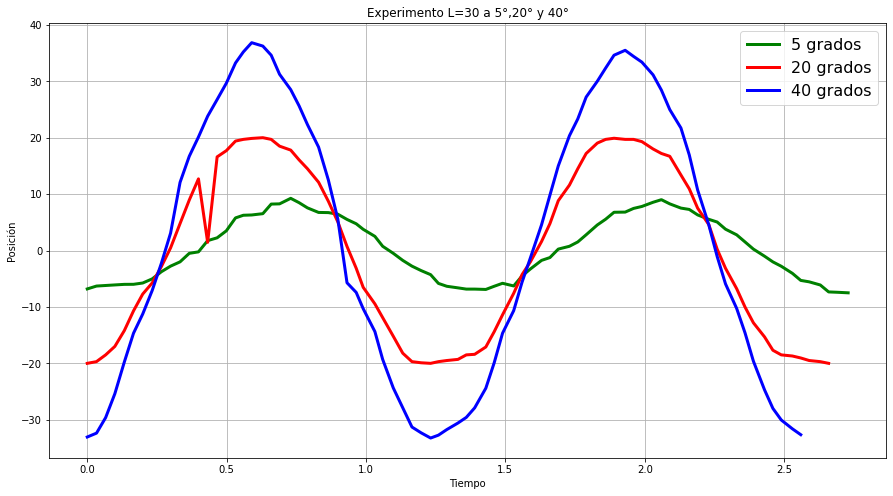

In [125]:
# Gráfica de posición angular vs tiempo
def plot_tethaVSt(tiempo, tetha):
  plt.figure(figsize=(15,8))
  plt.grid()
  plt.plot(tiempo[0], tetha[0], color = 'g', lw = 3, label = "5 grados")
  plt.plot(tiempo[1], tetha[1], color = 'r', lw = 3, label = "20 grados")
  plt.plot(tiempo[2], tetha[2], color = 'b', lw = 3, label = "40 grados")
  plt.legend(fontsize = 16)
  plt.xlabel("Tiempo")
  plt.ylabel("Posición")
  plt.title("Experimento L=30 a 5°,20° y 40°")
  plt.show()
plot_tethaVSt([experimento['t'],experimento2['t'],experimento3['t']],[experimento['θ'],experimento2['θ'],experimento3['θ']])

## Estimación de la gravedad



In [124]:
#Estimación de la gravedad
def grav_estima(L,T):
  g=(4* np.pi**2)*L/(T**2)
  g=g/100
  error=(g-9.8)/9.8*100
  return print("El valor de la gravedad es:",g," con un error de: ",abs(error),"%")

print(grav_estima(30,1.3))
print(grav_estima(30,1.1))
print(grav_estima(30,1.2))



El valor de la gravedad es: 7.008003125033863  con un error de:  28.489764030266713 %
None
El valor de la gravedad es: 9.788037422567957  con un error de:  0.12206711665351005 %
None
El valor de la gravedad es: 8.224670334241132  con un error de:  16.074792507743556 %
None


## Simulación de tetha

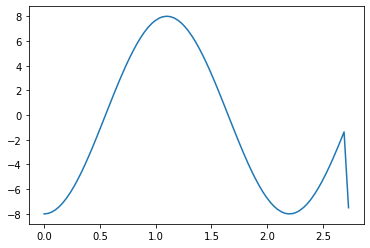

In [116]:
#Simulación pendulo
L=30
Ang=8
w0=10
g=-8.2
alpha_s = np.empty(len(experimento['α']))
w_s = np.empty(len(experimento['α']))
tetha_s = np.copy(experimento['θ'])
for i in range(0,len(experimento['θ'])-1):
  alpha_s[i]=(tetha_s[i]*g)/L
  w_s[i+1]=((w_s[i]+(alpha_s[i+1]-alpha_s[i])))




#plt.plot(experimento['t'],w_s)

for i in range(0,len(experimento['θ'])-1):
  tetha_s[i]=Ang*np.sin(np.pi/1.1*experimento['t'][i]-np.pi/2)

plt.plot(experimento['t'],tetha_s)
# plot_tethaVSt(experimento['t'],experimento['θ'])
# plot_tethaVSt(experimento['t'],tetha_s)
# plot_tethaVSt(experimento['t'],alpha_s)
# plot_tethaVSt(experimento['t'],w_s)


# Análisis L 50 a 5 y 20 grados


In [139]:
#Cargue de datos a un dataframe
experimento4=pd.read_excel("/content/gdrive/MyDrive/Octavo semestre/IntroFísica/Pendulo/Masa Grande L 50 a 5 grados.xlsx")
experimento5=pd.read_excel("/content/gdrive/MyDrive/Octavo semestre/IntroFísica/Pendulo/Masa Grande L 50 a 20 grados.xlsx")
experimento6=pd.read_excel("/content/gdrive/MyDrive/Octavo semestre/IntroFísica/Pendulo/Masa Grande L 50 a 40 grados.xlsx")

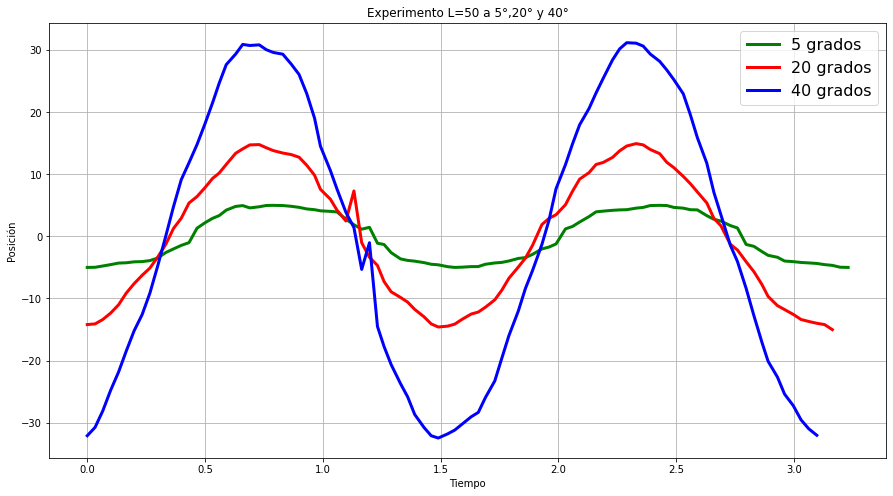

In [143]:
# Gráfica de posición angular vs tiempo
def plot_tethaVSt(tiempo, tetha):
  plt.figure(figsize=(15,8))
  plt.grid()
  plt.plot(tiempo[0], tetha[0], color = 'g', lw = 3, label = "5 grados")
  plt.plot(tiempo[1], tetha[1], color = 'r', lw = 3, label = "20 grados")
  plt.plot(tiempo[2], tetha[2], color = 'b', lw = 3, label = "40 grados")
  plt.legend(fontsize = 16)
  plt.xlabel("Tiempo")
  plt.ylabel("Posición")
  plt.title("Experimento L=50 a 5°,20° y 40°")
  plt.show()
plot_tethaVSt([experimento4['t'],experimento4['t'][:-1],experimento6['t']],[experimento4['θ'],experimento5['θ'],experimento6['θ']])


In [144]:
print(grav_estima(50,1.6))
print(grav_estima(50,1.5))
print(grav_estima(50,1.45))



El valor de la gravedad es: 7.710628438351059  con un error de:  21.320117976009605 %
None
El valor de la gravedad es: 8.772981689857207  con un error de:  10.479778674926461 %
None
El valor de la gravedad es: 9.38844651708857  con un error de:  4.1995253358309315 %
None
